------ SINUSOIDAL SIGNAL OPERATIONS ------


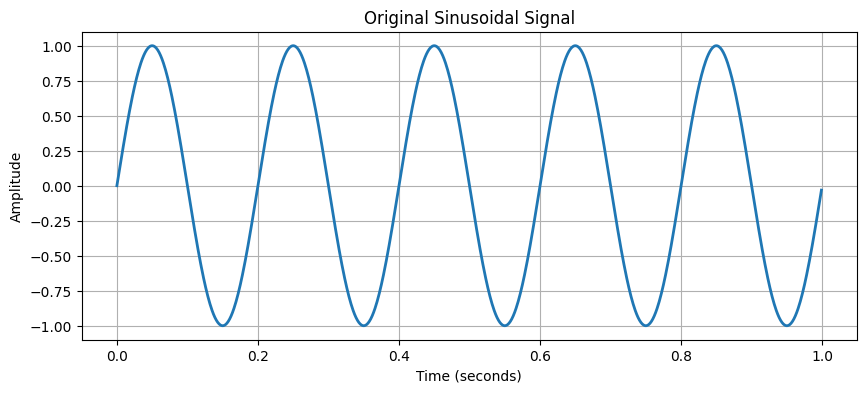

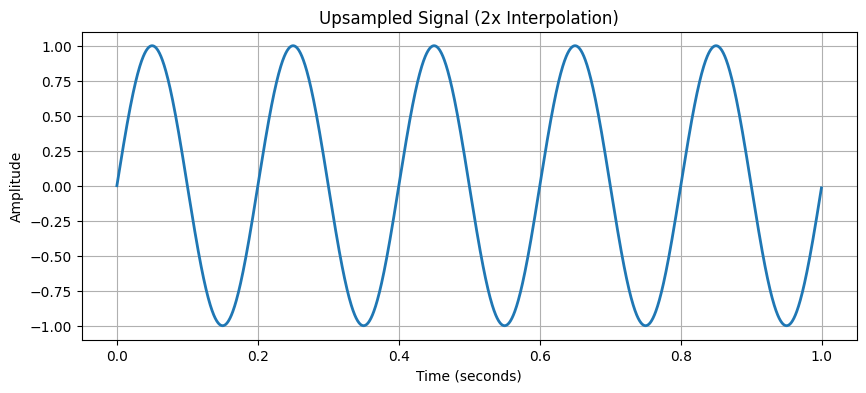

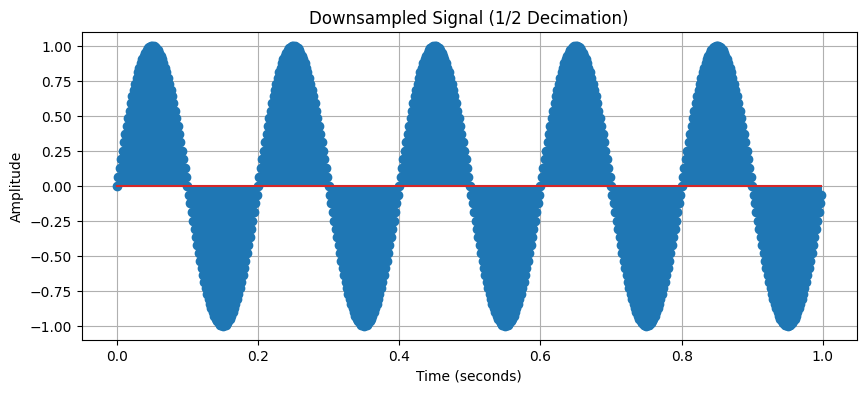


------ SPEECH SIGNAL OPERATIONS ------
Sampling Rate: 22050
Duration: 4.500181405895692


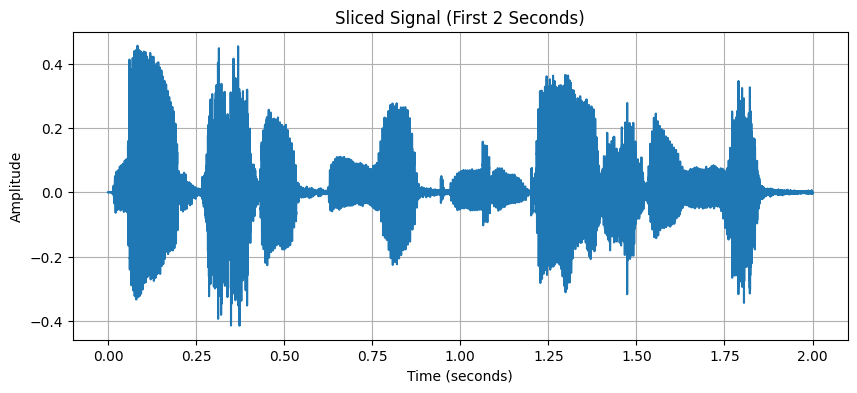

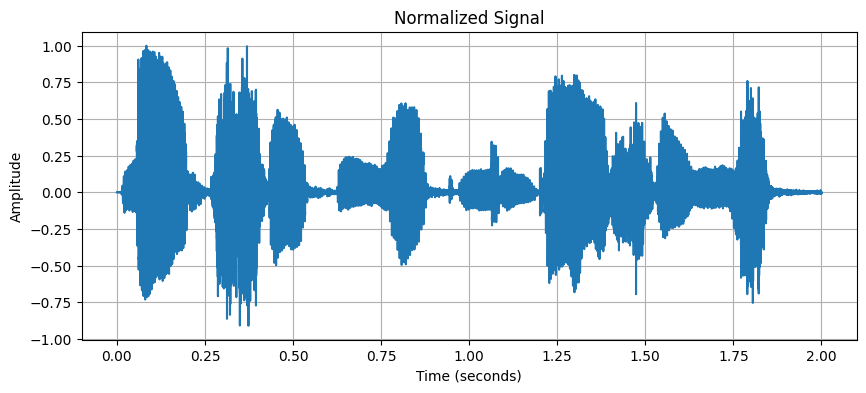

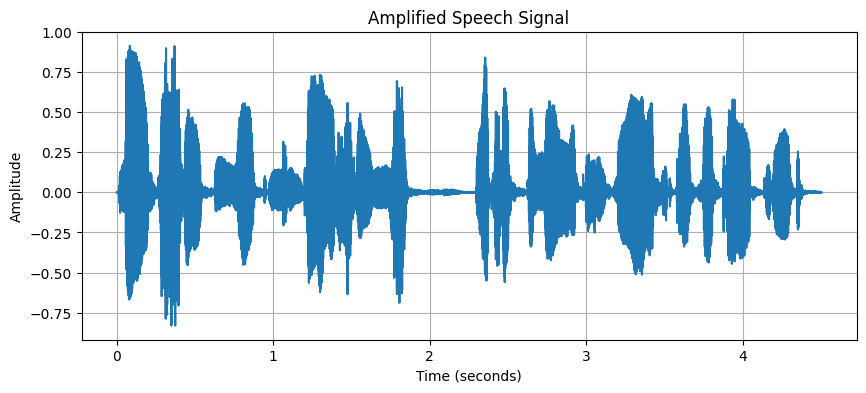

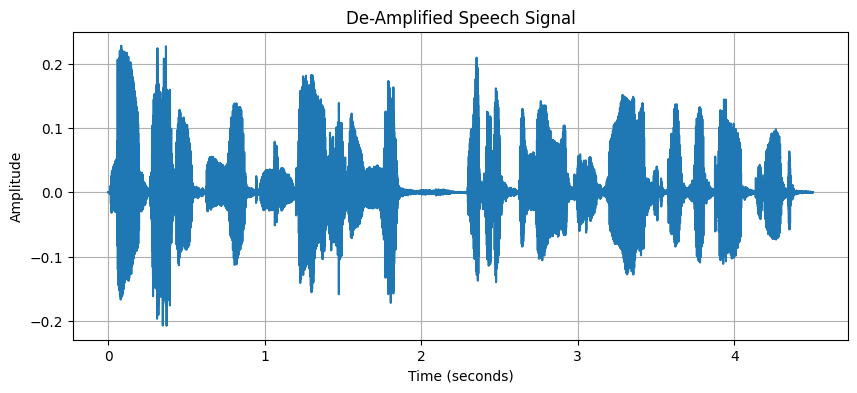

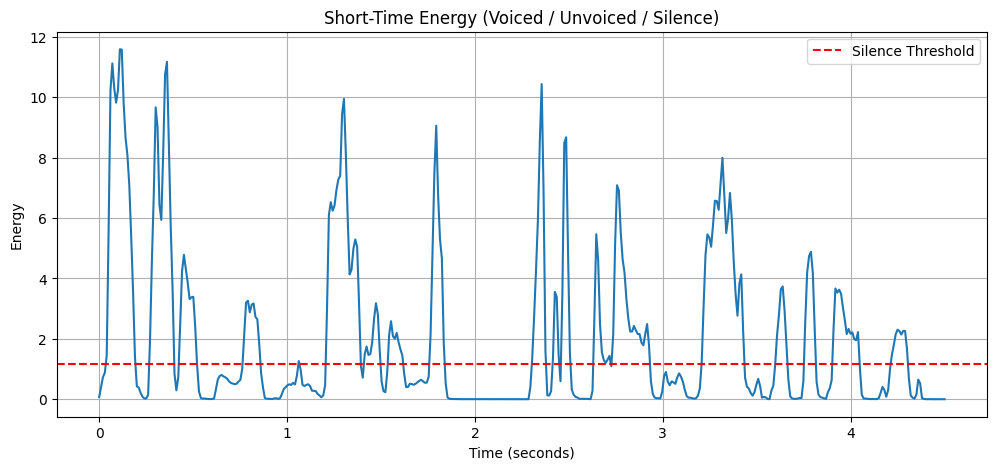

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
import librosa



print("------ SINUSOIDAL SIGNAL OPERATIONS ------")

fs = 1000
f = 5
duration = 1

t = np.arange(0, duration, 1/fs)
signal = np.sin(2 * np.pi * f * t)


upsample_factor = 2
fs_up = fs * upsample_factor
upsampled_signal = resample(signal, len(signal) * upsample_factor)
t_up = np.arange(0, duration, 1/fs_up)

downsample_factor = 2
fs_down = fs // downsample_factor
downsampled_signal = signal[::downsample_factor]
t_down = np.arange(0, duration, 1/fs_down)


plt.figure(figsize=(10,4))
plt.plot(t, signal, linewidth=2)
plt.title("Original Sinusoidal Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t_up, upsampled_signal, linewidth=2)
plt.title("Upsampled Signal (2x Interpolation)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,4))
plt.stem(t_down, downsampled_signal)
plt.title("Downsampled Signal (1/2 Decimation)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()




print("\n------ SPEECH SIGNAL OPERATIONS ------")

speech, sr = librosa.load('/content/LJ050-0274.wav', sr=None)

duration = len(speech) / sr
time = np.linspace(0, duration, len(speech))

print("Sampling Rate:", sr)
print("Duration:", duration)



slice_duration = 2
sliced = speech[:int(slice_duration * sr)]
time_slice = np.linspace(0, slice_duration, len(sliced))

plt.figure(figsize=(10,4))
plt.plot(time_slice, sliced)
plt.title("Sliced Signal (First 2 Seconds)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


normalized = sliced / np.max(np.abs(sliced))

plt.figure(figsize=(10,4))
plt.plot(time_slice, normalized)
plt.title("Normalized Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



amplified = 2 * speech

plt.figure(figsize=(10,4))
plt.plot(time, amplified)
plt.title("Amplified Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



de_amplified = 0.5 * speech

plt.figure(figsize=(10,4))
plt.plot(time, de_amplified)
plt.title("De-Amplified Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


frame_length = int(0.02 * sr)
hop_length = int(0.01 * sr)

energy = []
for i in range(0, len(speech)-frame_length, hop_length):
    frame = speech[i:i+frame_length]
    energy.append(np.sum(frame**2))

energy = np.array(energy)
energy_time = np.linspace(0, duration, len(energy))

threshold = 0.1 * np.max(energy)

plt.figure(figsize=(12,5))
plt.plot(energy_time, energy)
plt.axhline(threshold, color='r', linestyle='--', label="Silence Threshold")
plt.title("Short-Time Energy (Voiced / Unvoiced / Silence)")
plt.xlabel("Time (seconds)")
plt.ylabel("Energy")
plt.legend()
plt.grid()
plt.show()
